In [38]:
import pandas as pd
from IPython.display import display

covid_data = pd.read_csv('data_13/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [5]:
vaccinations_data = pd.read_csv('data_13/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


Предобработка данных в таблице covid_data

In [6]:
# Группируем таблицу по дате и названию страны 
# и рассчитываем суммарные показатели по всем регионам. 
# Тем самым переходим от данных по регионам к данным по странам:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [7]:
# Преобразуем даты в формат datetime с помощью функции pd.to_datetime()
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [8]:
# Создадим признак больных на данный момент (active). 
# Для этого вычтем из общего числа зафиксированных случаев число смертей и 
# число выздоровевших пациентов
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

In [9]:
# Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. 
# Для этого отсортируем данные по названиям стран, а затем по датам. 
# После этого произведём группировку по странам и 
# рассчитаем разницу между «вчера и сегодня» с помощью метода diff()
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [10]:
display(covid_data.head())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Предобработка данных в таблице vaccinations_data

In [12]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

# Задания
1. За какой период представлены данные в таблице covid_data? В качестве ответа введите даты в формате datetime (без указания времени).

In [14]:
print(covid_data['date'].min())
print(covid_data['date'].max())

2020-01-22 00:00:00
2021-05-29 00:00:00


2. За какой период представлены данные в таблице vaccinations_data? В качестве ответа введите даты в формате datetime без указания времени.

In [15]:
print(vaccinations_data['date'].min())
print(vaccinations_data['date'].max())

2020-12-02 00:00:00
2021-09-06 00:00:00


3. С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country.
Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1. То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более. Результат объединения занесите в переменную covid_df.

In [16]:
covid_df = covid_data.merge(
    vaccinations_data,
    on=['date', 'country'],
    how='left'
)
display(covid_df.head())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
covid_df.shape

(86785, 16)

В получившейся в задании 3.3 таблице covid_df создайте признаки death_rate — общий процент смертей среди зафиксированных случаев (летальность) и recover_rate — общий процент случаев выздоровления. Данные характеристики рассчитайте как отношение числа смертей (deaths) и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.

In [30]:
covid_df['death_rate'] = covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate'] = covid_df['recovered']/covid_df['confirmed']*100

4. Какова максимальная летальность в США (United States) за весь период? Ответ округлите до второго знака после запятой.

In [32]:
round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2)

7.19

5. Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака после запятой.

In [35]:
round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean().max(), 2)

67.06

# Базовая визуализация ( метод plot() )

Начнём с исследования заболеваемости коронавирусом во всём мире. Для этого первым делом отобразим, как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени. Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.
Будем использовать линейный график размером 12x4 (попробуйте взять другие числа, чтобы увидеть разницу). Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика.

<AxesSubplot:title={'center':'Ежедневная заболеваемость по всем странам'}, xlabel='date'>

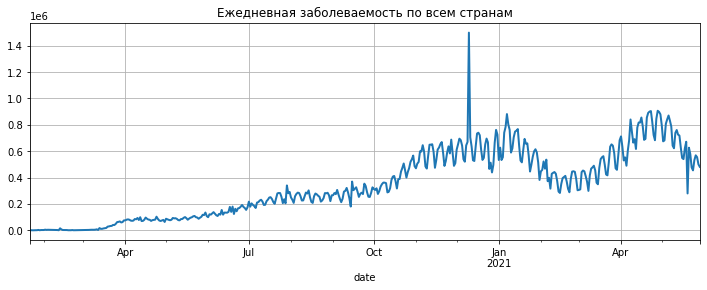

In [55]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость по всем странам',
    grid=True,
    lw=2
)

<AxesSubplot:title={'center':'Ежедневная заболеваемость по всем странам'}, xlabel='date'>

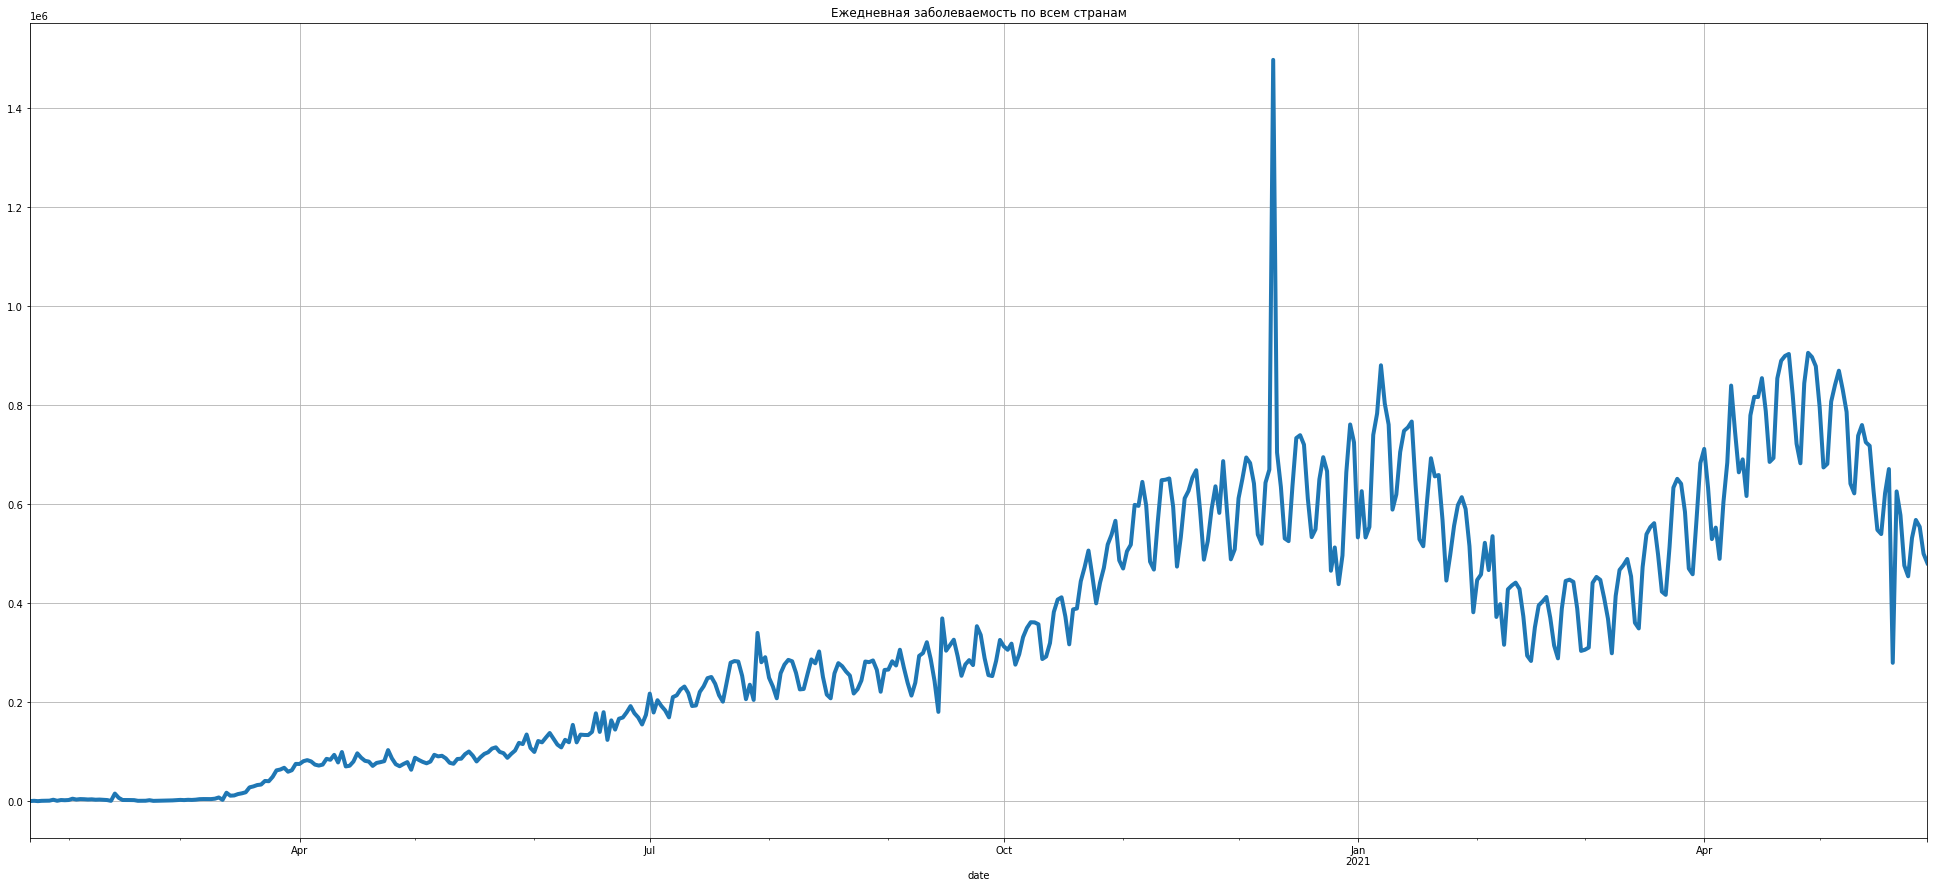

In [54]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(34, 15), # попробуем другие значения
    title='Ежедневная заболеваемость по всем странам',
    grid=True,
    lw=4
)

<AxesSubplot:title={'center':'Ежедневная заболеваемость по всем странам'}, xlabel='date'>

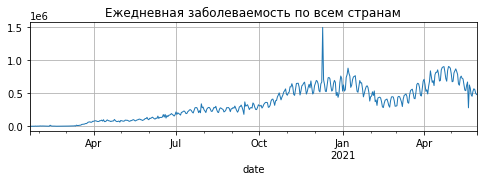

In [57]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum() # группировка по дате,
# обращение к столцу 'daily_confirmed', сумма значений в группах
grouped_cases.plot(
    kind='line',
    figsize=(8, 2), # попробуем значения меньше
    title='Ежедневная заболеваемость по всем странам',
    grid=True,
    lw=1
)

Теперь построим гистограмму, которая покажет распределение ежедневной заболеваемости во всём мире. Для этого параметр kind выставляем на значение 'hist'. Параметр bins (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10 (попробуйте использовать другие числа, чтобы увидеть разницу).

<AxesSubplot:title={'center':'Распределение ежедневной заболеваемости'}, ylabel='Frequency'>

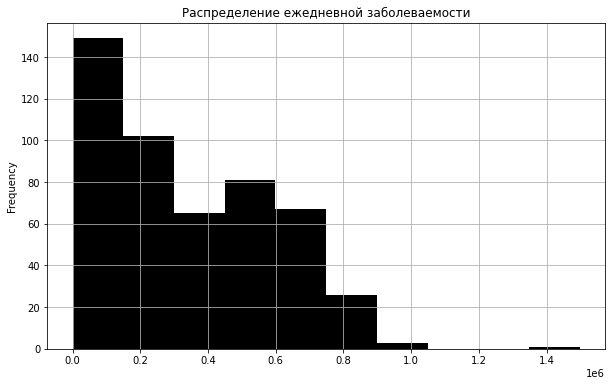

In [47]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid=True,
    color='black',
    bins=10
)

<AxesSubplot:title={'center':'Распределение ежедневной заболеваемости'}, ylabel='Frequency'>

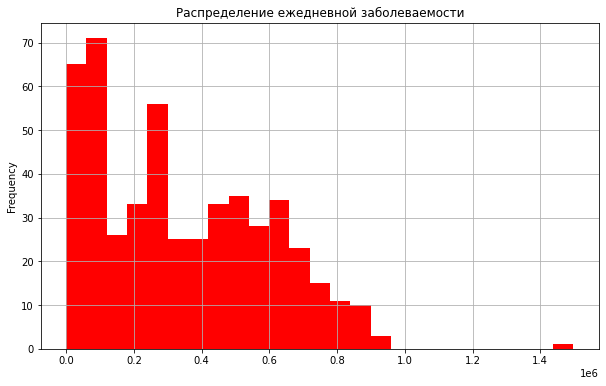

In [49]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid=True,
    color='red',
    bins=25 # больше корзин
)

<AxesSubplot:title={'center':'Распределение ежедневной заболеваемости'}, ylabel='Frequency'>

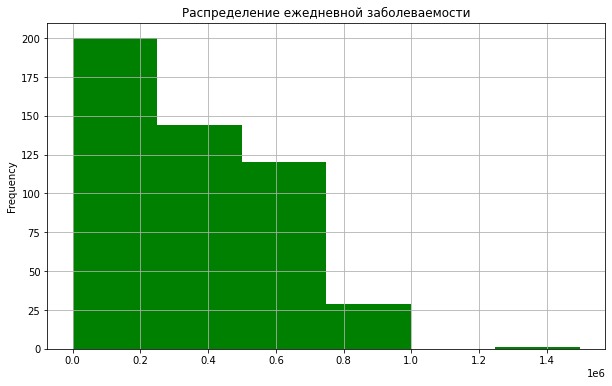

In [51]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid=True,
    color='green',
    bins=6 # меньше корзин
)

Давайте построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.
Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода last() — он возвращает последнее значение в столбце DataFrame.
Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. Параметр colormap отвечает за цветовую гамму графика.

<AxesSubplot:xlabel='country'>

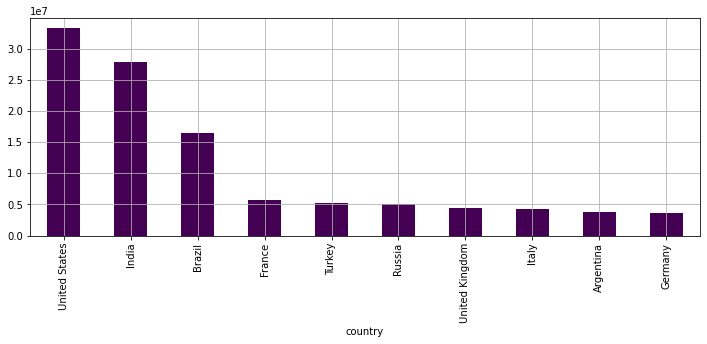

In [59]:
grouped_country = covid_df.groupby('country')['confirmed'].last() # групп-ка по странам, обращение к заболеваемости,
# возврат последнего значения в DF
grouped_country = grouped_country.nlargest(10) # отобрали 10 лидирующих стран
grouped_country.plot(
    kind='bar',
    figsize=(12, 4),
    grid=True,
    colormap='viridis'
)

А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. Для этого отобразим сразу два показателя на столбчатой диаграмме: 

<AxesSubplot:xlabel='country'>

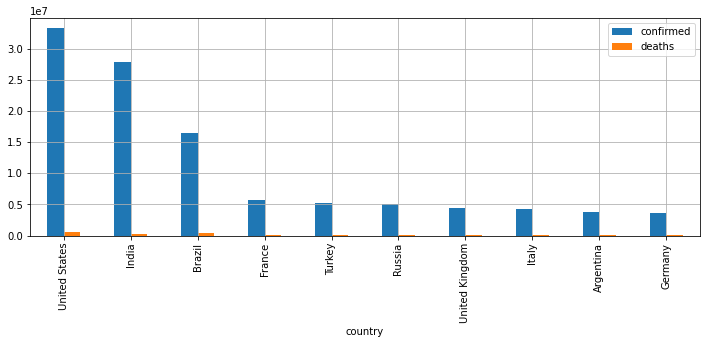

In [67]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last() # групп-ка по странам, обращение
# к заболевшим и умершим, возврат последнего значения в толбце
grouped_country = grouped_country.nlargest(10, columns=['confirmed']) # отбор 10 самых больших значений 
# из заболевших
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4)
)

график с сортировкой не по числу заболевших, а по числу умерших, поменяются и места, и страны в рейтинге. Попробуйте построить такой график сами!

<AxesSubplot:xlabel='country'>

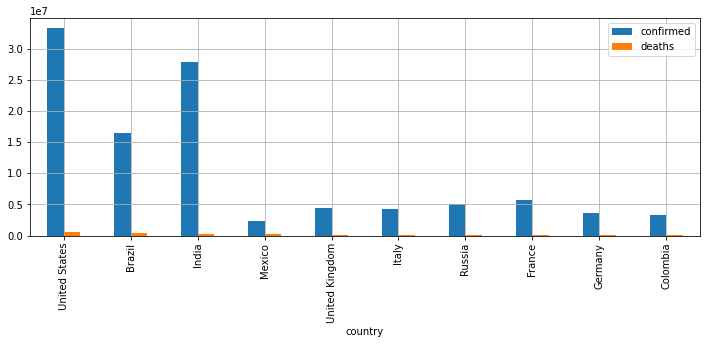

In [68]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['deaths'])

grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4)
)

построить столбчатую диаграмму для пяти стран с наименьшим общим числом вакцинаций на последний день рассматриваемого периода (total_vaccinations)
В какой стране число вакцинированных наименьшее

<AxesSubplot:xlabel='country'>

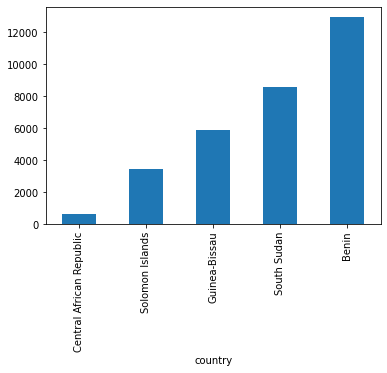

In [69]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar')

# библиотека matplotlib

In [73]:
import matplotlib.pyplot as plt # импорт модуля pyplot
%matplotlib inline  
plt.style.use('default') # для корректной работы на черной теме

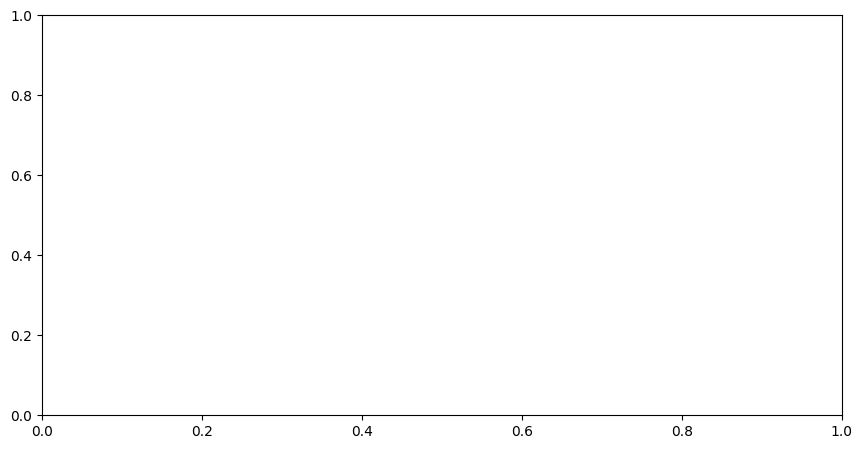

In [75]:
fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])

Утверждается, что коллективная вакцинация позволяет минимизировать риск заражения коронавирусной инфекцией (но только после второго компонента). Давайте проверим это на примере США: построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (daily_confirmed) от общего количества привитых вторым компонентом вакцины (people_fully_vaccinated) в США.
У объекта координатной плоскости axes вызовем метод scatter().
На диаграмме рассеяния по оси абсцисс откладываем суммарное число поставленных вакцин, а по оси ординат — ежедневный прирост заболевших:

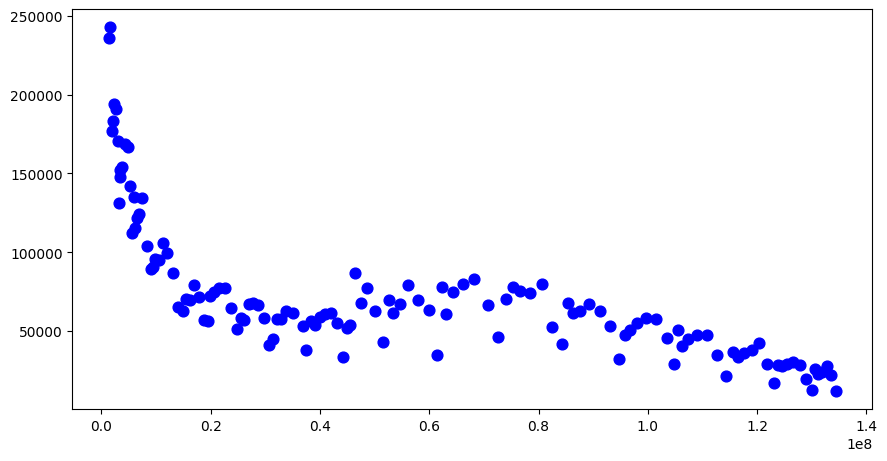

In [84]:
us_data = covid_df[covid_df['country'] == 'United States'] # фильтр, берем данные по US

fig = plt.figure(figsize=[8,4]) # создали фигуру
axes = fig.add_axes([0,0,1,1]) # создали систему координат
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=60,
    marker='o',
    c='blue'
)

Построим круговую диаграмму, чтобы отобразить ТОП-10 комбинаций вакцин в мире.
Примечание. Обратите внимание, что под «распространённостью» вакцины здесь подразумевается не количество введённых доз (таких данных у нас в таблице нет), а количество стран, в которых она используется. При этом подсчёт ведётся не по каждой отдельной вакцине, а по их комбинациям, и одна и та же вакцина учитывается несколько раз в сочетаниях с другими.

([<matplotlib.patches.Wedge at 0x1272dfbb0>,
 [Text(0.7665420934957, 0.9232622698341082, 'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-0.5931469540063179, 0.9263782655875662, 'Oxford/AstraZeneca'),
  Text(-1.0669756518152362, 0.26751253883407417, 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-0.9691397141646498, -0.5203539318856552, 'Oxford/AstraZeneca, Sinopharm/Beijing'),
  Text(-0.4285591388052899, -1.013082950476647, 'Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(0.16276477267022196, -1.0878913680959192, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V'),
  Text(0.6404448584916131, -0.8943323673174632, 'Moderna, Pfizer/BioNTech'),
  Text(0.9150658010408987, -0.610454404329577, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing'),
  Text(1.03477305208093, -0.37315510272153224, 'Pfizer/BioNTech'),
  Text(1.092724197741022, -0.126308462389659, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V')],
 [Text(0.447149554539

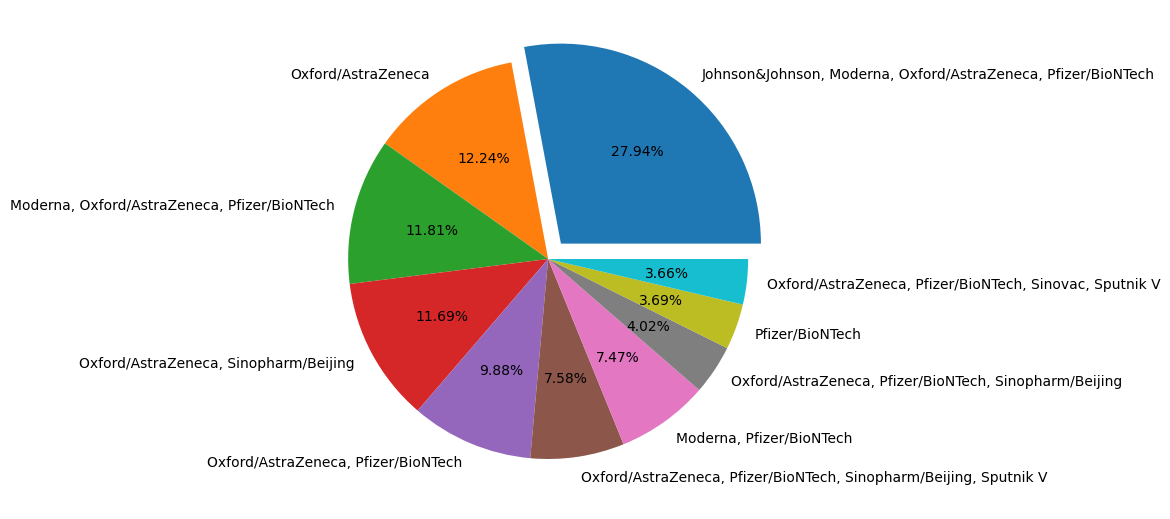

In [90]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10] # 10 самых распр-х вакцин

fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index, # названия секторов - индексы
    autopct='%.2f%%', # подписи - округление до 2 знаков, знак '%'
    explode=[0.1,0,0,0,0,0,0,0,0,0] # самый большой суктор удалить от центра на 10%
)

изобразим на одном графике, как росла общая заболеваемость (confirmed), число зафиксированных смертей (deaths), выздоровевших пациентов (recovered) и активных случаев (active) в Китае.

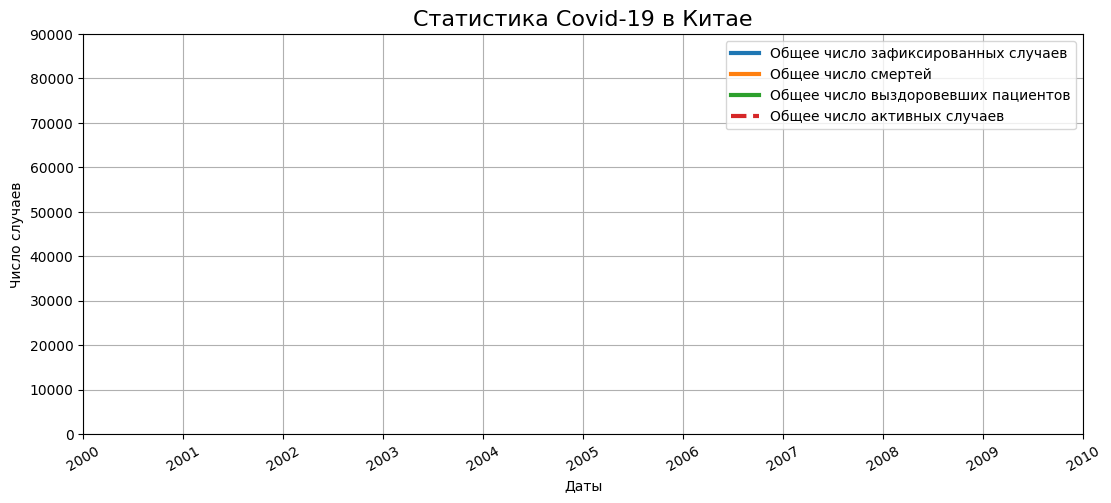

In [94]:
china_data = covid_df[covid_df['country'] == 'Cina'] # фильтр - данные по Китаю
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()
# групп-ка по датам, сумма нужных значений
# визуализация:
fig = plt.figure(figsize=(10,4))
axes = fig.add_axes([0,0,1,1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')
# параметры отображения:
axes.set_title('Статистика Covid-19 в Китае', fontsize=16) # назв. графика, р-р шрифта
axes.set_xlabel('Даты') # подпись по оси х
axes.set_ylabel('Число случаев') # подпись по оси у
axes.set_yticks(range(0, 100000, 10000)) # частота по оси у 10000
axes.xaxis.set_tick_params(rotation=30) # поворот меток на х на 30 град
axes.grid() # сетка
axes.legend() # легенда